# HR Analytics - Employee Performance
This file is part of a demo.
In this file, the data will be gathered, cleaned, transformed and stored. After these steps, the data can be used to create a machine learning model.

In [ ]:
########################################################################################
# This is a demo on HR Analytics
# Source data: https://github.com/RHuebner1972/HRDatasets
########################################################################################

# Install the needed packages
list.of.packages <- c("tidyverse","dplyr","janitor","lubridate","ggplot2","flexmix", "nnet", 
                      "nFactors", "QuantPsyc", "psych","asw.cluster","tidyr","data.table")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[, "Package"])]
if (length(new.packages)) install.packages(new.packages)

# libs
library(tidyverse)
library(dplyr)
library(janitor)
library(ggplot2)
library(lubridate)
library(flexmix)
library(nnet)
library(nFactors)
library(QuantPsyc)
library(psych)
library(asw.cluster)
library(data.table)
library(tidyr)
library(plyr)

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: 'plyr'

The following object is masked from 'package:lubridate':

    here

The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from 'package:purrr':

    compact



## Data acquisition

In [ ]:
# HR data and data dictionary
filename <- "https://raw.githubusercontent.com/RHuebner1972/HRDatasets/master/HRDataset_v13.csv"
hr_data <- read.csv(file=filename,head=TRUE,sep=",",na.strings=c("NA","#DIV/0!","#N/A",""))
filename_dictionary <- "https://raw.githubusercontent.com/RHuebner1972/HRDatasets/master/HRDataset_v13_DataDictionary.csv"
hr_data_dictionary <- read.csv(file=filename_dictionary,head=TRUE,sep=",",na.strings=c("NA","#DIV/0!","#N/A",""))

## Data understanding
First we take a quick look at the data set to get a generic impression of the data. First we check the variable types and get the code book to check what the variable types should be.

In [ ]:
# take a quick look
glimpse(hr_data)

Observations: 401
Variables: 35
$ Employee_Name              <fct> "Brown, Mia", "LaRotonda, William  ", "S...
$ EmpID                      <int> 1103024456, 1106026572, 1302053333, 1211...
$ MarriedID                  <int> 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0...
$ MaritalStatusID            <int> 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 4, 1, 0...
$ GenderID                   <int> 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1...
$ EmpStatusID                <int> 1, 1, 1, 1, 1, 5, 5, 1, 1, 1, 1, 4, 1, 5...
$ DeptID                     <int> 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6...
$ PerfScoreID                <int> 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3...
$ FromDiversityJobFairID     <int> 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0...
$ PayRate                    <dbl> 28.50, 23.00, 29.00, 21.50, 16.56, 20.50...
$ Termd                      <int> 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1...
$ PositionID                 <int> 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3...
$ Position          

In [ ]:
# get more information about the available variables
hr_data_dictionary

Feature,Description,DataType
<fct>,<fct>,<fct>
Employee Name,Employee's full name,Text
EmpID,Employee ID is unique to each employee,Text
MarriedID,Is the person married (1 or 0 for yes or no),Binary
MaritalStatusID,Marital status code that matches the text field MaritalDesc,Integer
EmpStatusID,Employment status code that matches text field EmploymentStatus,Integer
DeptID,Department ID code that matches the department the employee works in,Integer
PerfScoreID,Performance Score code that matches the employee's most recent performance score,Integer
FromDiversityJobFairID,Was the employee sourced from the Diversity job fair? 1 or 0 for yes or no,Binary
PayRate,The person's hourly pay rate. All salaries are converted to hourly pay rate,Float


Now we take a look at the content. This shows us information about how many missing observations we have, and some basic statistics, like the mean, median, and range. 

In [ ]:
summary(hr_data)

                  Employee_Name     EmpID             MarriedID     
 Adinolfi, Wilson  K     :  1   Min.   :6.020e+08   Min.   :0.0000  
 Ait Sidi, Karthikeyan   :  1   1st Qu.:1.101e+09   1st Qu.:0.0000  
 Akinkuolie, Sarah       :  1   Median :1.203e+09   Median :0.0000  
 Alagbe,Trina            :  1   Mean   :1.200e+09   Mean   :0.3968  
 Albert, Michael         :  1   3rd Qu.:1.379e+09   3rd Qu.:1.0000  
 (Other)                 :305   Max.   :1.988e+09   Max.   :1.0000  
 NA's                    : 91   NA's   :91          NA's   :91      
 MaritalStatusID     GenderID      EmpStatusID        DeptID     
 Min.   :0.0000   Min.   :0.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:1.000   1st Qu.:5.000  
 Median :1.0000   Median :0.000   Median :1.000   Median :5.000  
 Mean   :0.8097   Mean   :0.429   Mean   :2.397   Mean   :4.606  
 3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:5.000   3rd Qu.:5.000  
 Max.   :4.0000   Max.   :1.000   Max.   :5.000   Ma

## Data Cleaning
We notice some inconsistency in the variable naming, so we fix this first.

In [ ]:
# clean variable names
hr_data <- hr_data %>%
  clean_names()

names(hr_data)

[1] "employee_name"                "emp_id"                      
 [3] "married_id"                   "marital_status_id"           
 [5] "gender_id"                    "emp_status_id"               
 [7] "dept_id"                      "perf_score_id"               
 [9] "from_diversity_job_fair_id"   "pay_rate"                    
[11] "termd"                        "position_id"                 
[13] "position"                     "state"                       
[15] "zip"                          "dob"                         
[17] "sex"                          "marital_desc"                
[19] "citizen_desc"                 "hispanic_latino"             
[21] "race_desc"                    "dateof_hire"                 
[23] "dateof_termination"           "term_reason"                 
[25] "employment_status"            "department"                  
[27] "manager_name"                 "manager_id"                  
[29] "recruitment_source"           "performance_score"           
[31] "engagement_survey"            "emp_satisfaction"            
[33] "special_projects_count"       "last_performance_review_date"
[35] "days_late_last30"

Before we start a further inspection, we start with employees that are identifyable, so we remove the observations that are missing the employee names.

In [ ]:
# we need data that contains an employee number and a performance review
hr_data <- hr_data %>% 
  filter(!is.na(employee_name)) %>% 
  filter(!is.na(last_performance_review_date))

In [ ]:
summary(hr_data)

             employee_name     emp_id            married_id   
 Adinolfi, Wilson  K:  1   Min.   :6.020e+08   Min.   :0.000  
 Alagbe,Trina       :  1   1st Qu.:1.101e+09   1st Qu.:0.000  
 Albert, Michael    :  1   Median :1.203e+09   Median :0.000  
 Anderson, Linda    :  1   Mean   :1.204e+09   Mean   :0.372  
 Andreola, Colby    :  1   3rd Qu.:1.402e+09   3rd Qu.:1.000  
 Athwal, Sam        :  1   Max.   :1.988e+09   Max.   :1.000  
 (Other)            :201                                      
 marital_status_id   gender_id      emp_status_id      dept_id    
 Min.   :0.000     Min.   :0.0000   Min.   :1.000   Min.   :1.00  
 1st Qu.:0.000     1st Qu.:0.0000   1st Qu.:1.000   1st Qu.:4.00  
 Median :1.000     Median :0.0000   Median :1.000   Median :5.00  
 Mean   :0.744     Mean   :0.4348   Mean   :1.188   Mean   :4.56  
 3rd Qu.:1.000     3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:5.00  
 Max.   :4.000     Max.   :1.0000   Max.   :3.000   Max.   :6.00  
                           

In [ ]:
# set the data variables in a correct format
# clean capitals in hispanic_latino
hr_data <- hr_data %>%
  mutate(dateof_hire = as.Date(dateof_hire, "%m/%e/%Y"),
         dob = as.Date(dob,"%m/%d/%y"),
         dateof_termination = as.Date(dateof_termination,"%m/%d/%y"),
         last_performance_review_date = as.Date(last_performance_review_date,"%m/%d/%Y"),
         hispanic_latino = tolower(hispanic_latino))

## Data visualization
Just a quick impression, please feel free to elaborate this section.

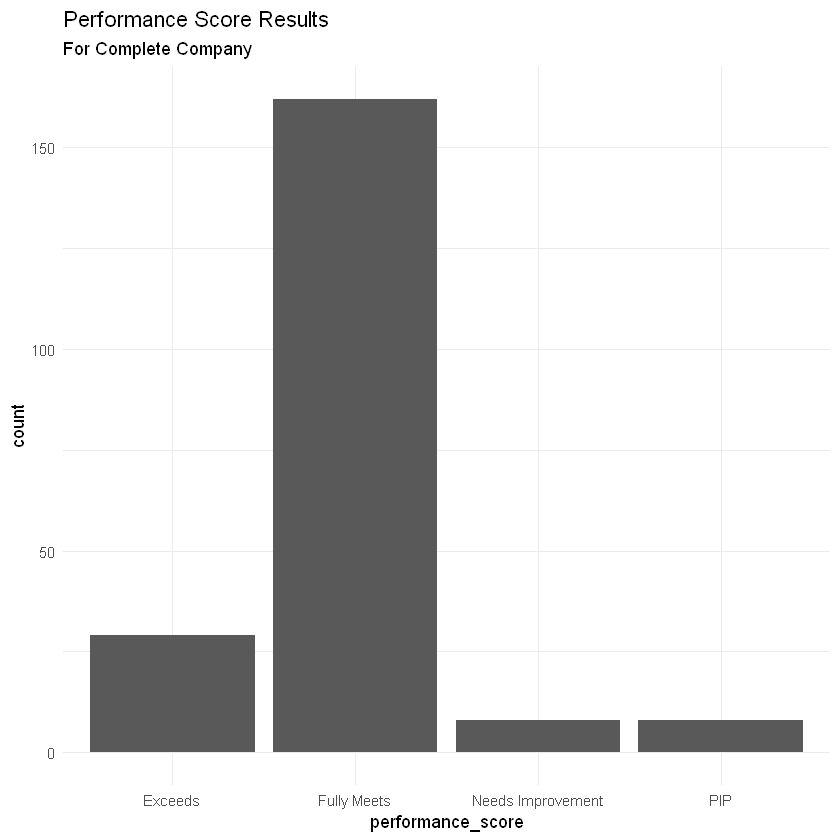

In [ ]:
ggplot(hr_data) +
  aes(x=performance_score) +
  geom_bar() +
  labs(title = "Performance Score Results", subtitle = "For Complete Company") +
  theme_minimal()

# most of the employees are doing fine

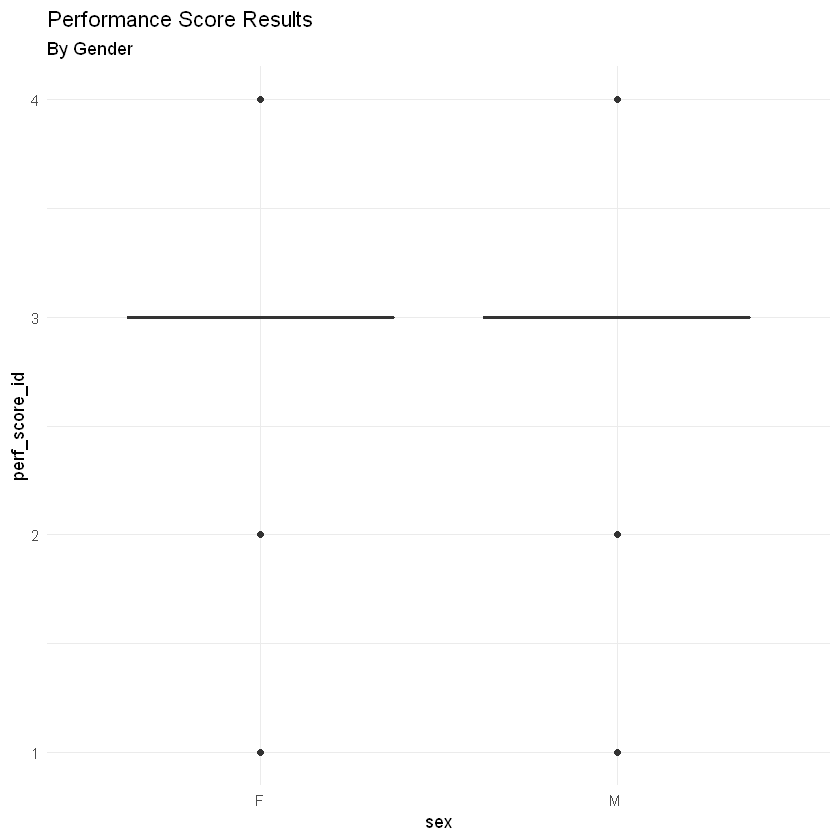

In [ ]:
ggplot(hr_data) +
  aes(x = sex, y = perf_score_id) +
  geom_boxplot() +
  labs(title = "Performance Score Results", subtitle = "By Gender") +
  theme_minimal()

# and there are not much differences in their scores regarding their gender

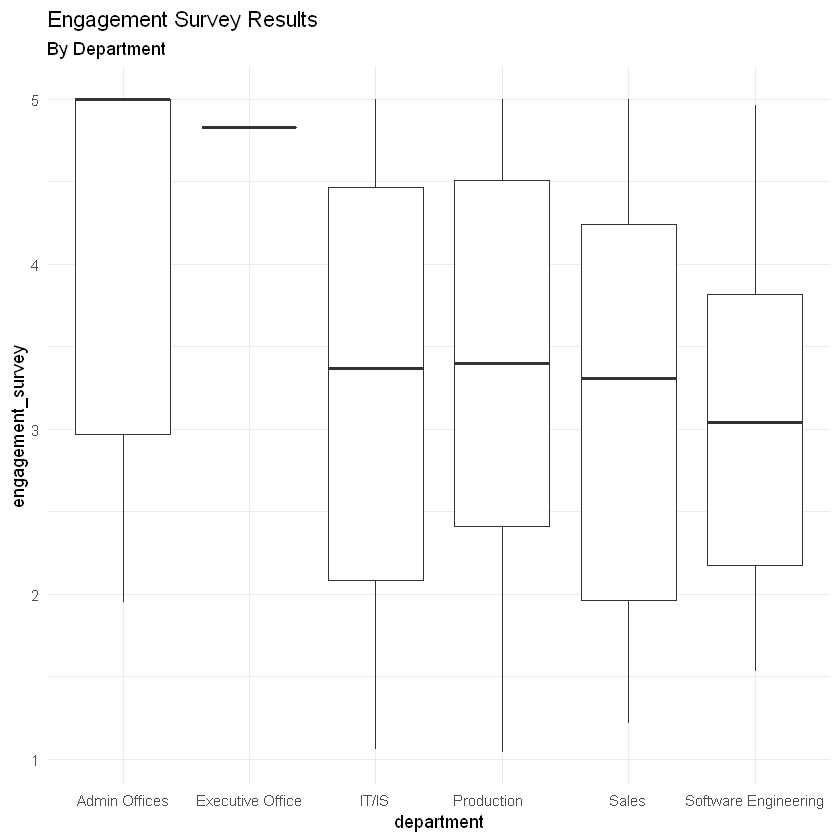

In [ ]:
ggplot(hr_data) +
  aes(x = department, y = engagement_survey) +
  geom_boxplot() +
  labs(title = "Engagement Survey Results", subtitle = "By Department") +
  theme_minimal()

# but we do see some differences by department

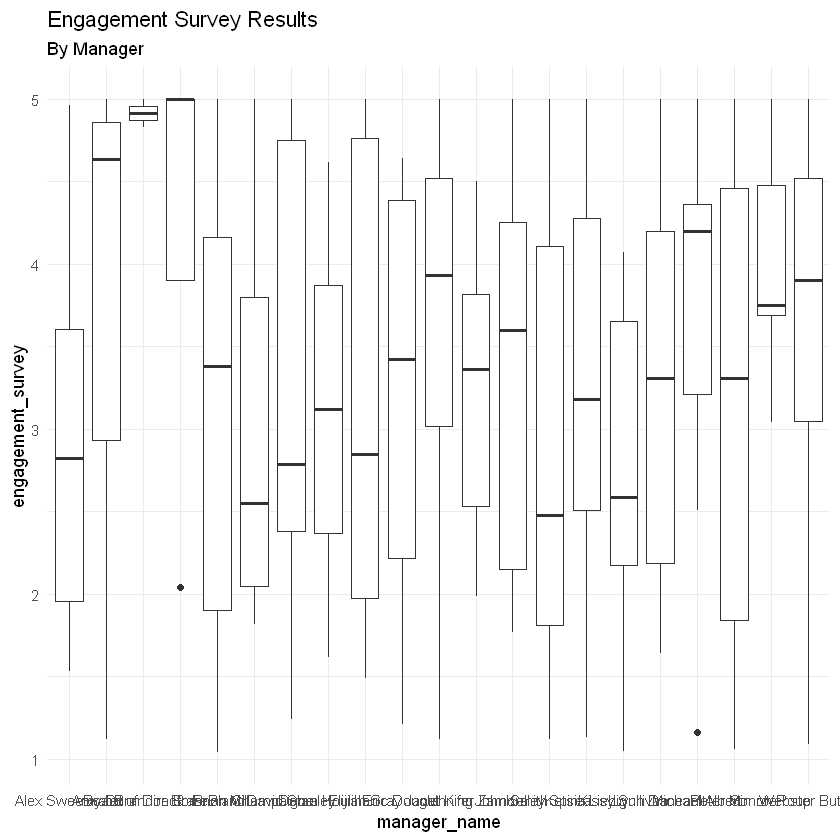

In [ ]:
ggplot(hr_data) +
  aes(x = manager_name, y = engagement_survey) +
  geom_boxplot() +
  labs(title = "Engagement Survey Results", subtitle = "By Manager") +
  theme_minimal()

# and we do see some differences by manager

## Feature Engineering
we will create the following variables
- tenure: how long is the employee working for the company at the moment of performance review?
- age: what is the age of the employee at the moment of the performance review?
- faultline score: what is the risk score of a team falling into sub groups?


In [ ]:
# TENURE and AGE
# Create a variable "tenure" based on hiring date and performance review date, and age based on the performance review date and date of birth
hr_data <- hr_data %>%
  mutate(tenure = round((last_performance_review_date-dateof_hire)/365.25,2),
         age = (last_performance_review_date-dob)/365.25,
         age_corrected = round(ifelse(age<0, age+100, age),2))

# clean up temp variable
hr_data$age <- NULL

In [ ]:
# FAULTLINES
# Teams can potentially split into sub groups, which is not always good for performance. Here you can read more about it: http://www.group-faultlines.org/
# Or check one of my papers

# select variables for faultline calculation
selectVariables <- c("manager_name", "sex","age_corrected", "race_desc", "pay_rate")

# set attributes of selected variables
my_attr <- c("nominal", "numeric", "nominal", "numeric")

# set weights of selected variables
my_weights <- c(1,1,1,1)

# set team id variable
teamID <- "manager_name"

# set faultline method
faultlineMethod <- "asw"

# select columns
df <- hr_data[,selectVariables]
df

manager_name,sex,age_corrected,race_desc,pay_rate
<fct>,<fct>,<dbl>,<fct>,<dbl>
Brandon R. LeBlanc,F,31.14,Black or African American,28.50
Brandon R. LeBlanc,M,34.73,Black or African American,23.00
Brandon R. LeBlanc,M,32.38,White,29.00
Brandon R. LeBlanc,F,30.66,White,16.56
John Smith,F,55.69,White,55.00
John Smith,F,31.71,White,55.00
John Smith,M,30.38,American Indian or Alaska Native,56.00
John Smith,M,49.89,Two or more races,55.50
John Smith,M,64.30,White,55.50


In [ ]:
# use Meyer and Glenz faultlines algorithm
my_Fau <- faultlines(data = df, 
                     group.par = teamID, 
                     attr.type = my_attr, 
                     attr.weight = my_weights,
                     method = faultlineMethod)

Group: 1   Groupsize: 6 
Group: 2   Groupsize: 8 
Group: 3   Groupsize: 2 
Group: 4   Groupsize: 5 
Group: 5   Groupsize: 15 
Group: 6   Groupsize: 8 
Group: 7   Groupsize: 15 
Group: 8   Groupsize: 2 
Group: 9   Groupsize: 14 
Group: 10   Groupsize: 4 
Group: 11   Groupsize: 13 
Group: 12   Groupsize: 6 
Group: 13   Groupsize: 11 
Group: 14   Groupsize: 16 
Group: 15   Groupsize: 16 
Group: 16   Groupsize: 10 
Group: 17   Groupsize: 13 
Group: 18   Groupsize: 13 
Group: 19   Groupsize: 13 
Group: 20   Groupsize: 9 
Group: 21   Groupsize: 8 


ERROR: Error in ldply(my_Fau, data.frame): could not find function "ldply"


In [ ]:
# get the results
my_Fau_results <- summary(my_Fau)$long

# set results in frame
my_Fau_df <- ldply (my_Fau, data.frame)

# select fields to merge with data file
fl <- subset(my_Fau_df, !is.na(my_Fau_df$team))

selectFl <- c("team","teamsize","number_of_subgroups","fl.value")
fl <- unique(fl[,selectFl])
fl

,team,teamsize,number_of_subgroups,fl.value
,<fct>,<int>,<int>,<dbl>
1,Alex Sweetwater,6,3,0.4772088
7,Amy Dunn,8,3,0.4079382
15,Board of Directors,2,2,0.0000000
17,Brandon R. LeBlanc,5,2,0.4515326
22,Brannon Miller,15,4,0.6150082
37,Brian Champaigne,8,2,0.6040943
45,David Stanley,15,2,0.4803879
60,Debra Houlihan,2,2,0.0000000
62,Elijiah Gray,14,2,0.4685196


In [ ]:
# add the faultline score to the main data set
hr_data <- merge(hr_data,fl,by.x="manager_name", by.y="team",all.x = TRUE)

In [ ]:
# final inspection of the data
summary(hr_data)

         manager_name             employee_name     emp_id         
 Kelley Spirea : 16   Adinolfi, Wilson  K:  1   Min.   :6.020e+08  
 Ketsia Liebig : 16   Alagbe,Trina       :  1   1st Qu.:1.101e+09  
 Brannon Miller: 15   Albert, Michael    :  1   Median :1.203e+09  
 David Stanley : 15   Anderson, Linda    :  1   Mean   :1.204e+09  
 Elijiah Gray  : 14   Andreola, Colby    :  1   3rd Qu.:1.402e+09  
 Janet King    : 13   Athwal, Sam        :  1   Max.   :1.988e+09  
 (Other)       :118   (Other)            :201                      
   married_id    marital_status_id   gender_id      emp_status_id  
 Min.   :0.000   Min.   :0.000     Min.   :0.0000   Min.   :1.000  
 1st Qu.:0.000   1st Qu.:0.000     1st Qu.:0.0000   1st Qu.:1.000  
 Median :0.000   Median :1.000     Median :0.0000   Median :1.000  
 Mean   :0.372   Mean   :0.744     Mean   :0.4348   Mean   :1.188  
 3rd Qu.:1.000   3rd Qu.:1.000     3rd Qu.:1.0000   3rd Qu.:1.000  
 Max.   :1.000   Max.   :4.000     Max.   :1.000

## Store the data

In [ ]:
# create a validation set
validation_set <- hr_data %>% 
  filter(employment_status=="Future Start")

# clean up the original performance
validation_set$perf_score_id <- NULL
validation_set$performance_score <- NULL

# create a training set
training_set <- hr_data %>% 
  filter(employment_status!="Future Start")

In [ ]:
# write the files
write.csv(validation_set, file = "hr_analytics_validation.csv", row.names = FALSE)
write.csv(training_set, file = "hr_analytics_training.csv", row.names = FALSE)